In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
laptopy = pd.read_csv("C:\\Users\\malgo\\Documents\\WED\\cleaned.csv")

### Rozmiar i typy

In [8]:
laptopy.columns

Index(['Brand', 'Product_Description', 'Screen_Size', 'RAM', 'Processor',
       'GPU', 'GPU_Type', 'Resolution', 'Condition', 'Price'],
      dtype='object')

In [9]:
laptopy.index

RangeIndex(start=0, stop=2952, step=1)

In [10]:
laptopy.shape

(2952, 10)

In [25]:
laptopy.columns

Index(['Brand', 'Product_Description', 'Screen_Size', 'RAM', 'Processor',
       'GPU', 'GPU_Type', 'Resolution', 'Condition', 'Price'],
      dtype='object')

In [4]:
laptopy.dtypes

Brand                   object
Product_Description     object
Screen_Size            float64
RAM                     object
Processor               object
GPU                     object
GPU_Type                object
Resolution              object
Condition               object
Price                  float64
dtype: object

### Statystyki

In [5]:
laptopy.describe()

,Screen_Size,Price
count,2952.000000,2952.000000
mean,14.550237,517.552805
std,1.175322,235.592872
min,10.000000,0.000000
25%,14.000000,325.990000
50%,14.000000,489.990000
75%,15.600000,699.000000
max,18.000000,999.990000


In [27]:
laptopy.loc[:, "Brand"].value_counts()

Dell         1109
Lenovo        627
HP            578
Microsoft     197
Asus          134
Acer          100
MSI            62
Samsung        61
LG             38
Gateway        13
Panasonic       5
Apple           5
Razer           4
Sony            3
Gigabyte        3
Dell Inc.       2
Chuwi           2
Intel           2
Huawei          1
Getac           1
Google          1
ByteSpeed       1
Eurocom         1
AVITA           1
Ruggon          1
Name: Brand, dtype: int64

In [73]:
df = laptopy[["Brand", "Screen_Size", "Price"]].groupby(["Brand"]).agg(["mean", "max", "min"])
df.columns = df.columns.values
df.columns = pd.MultiIndex.from_tuples(df.rename(columns={('Screen_Size', 'mean'): ('', 'mean_screen_size'), ('Screen_Size', 'max'): ('', 'max_screen_size'), ('Screen_Size', 'min'): ('', 'min_screen_size') \
                                                         , ('Price', 'mean'): ('', 'mean_price'), ('Price', 'max'): ('', 'max_price'), ('Price', 'min'): ('', 'min_price')}))
df.columns = df.columns.droplevel()
df.sort_values(["mean_screen_size"], ascending = False)

,mean_screen_size,max_screen_size,min_screen_size,mean_price,max_price,min_price
Brand,,,,,,
LG,16.031579,17.0,14.0,694.176579,999.00,39.49
ByteSpeed,15.600000,15.6,15.6,199.990000,199.99,199.99
Dell Inc.,15.600000,15.6,15.6,215.990000,239.99,191.99
Eurocom,15.600000,15.6,15.6,800.000000,800.00,800.00
MSI,15.374194,17.3,14.0,718.793226,999.99,116.99
Asus,15.373134,17.3,13.3,547.264104,999.95,88.24
Razer,15.150000,16.0,13.4,499.745000,839.00,0.00
Gigabyte,15.033333,15.6,13.9,631.463333,999.99,44.45
Acer,14.915000,17.3,13.5,554.285400,981.00,95.46


In [101]:
ram = laptopy["RAM"].copy()

In [113]:
ram[(ram == "16") | (ram == "16gb") | (ram == "16GB,")] = "16GB"
ram[(ram == "8") | (ram == "8gb") | (ram == "8GB,")] = "8GB"
ram[(ram == "64") | (ram == "64gb")] = "64GB"
ram[(ram == "32")] = "32GB"
ram[(ram == "4")] = "4GB"
ram[(ram == "up") | (ram == "upto")] = "Up"
ram[(ram == "20")] = "20GB"
ram[(ram == "12")] = "12GB"
ram[(ram == "40")] = "40GB"
ram[(ram == "256")] = "256GB"
ram[(ram == "512")] = "512GB"
ram[(ram == "12")] = "12GB"
ram[(ram == "24")] = "24GB"
laptopy["RAM"] = ram

### Rozkład zmiennych

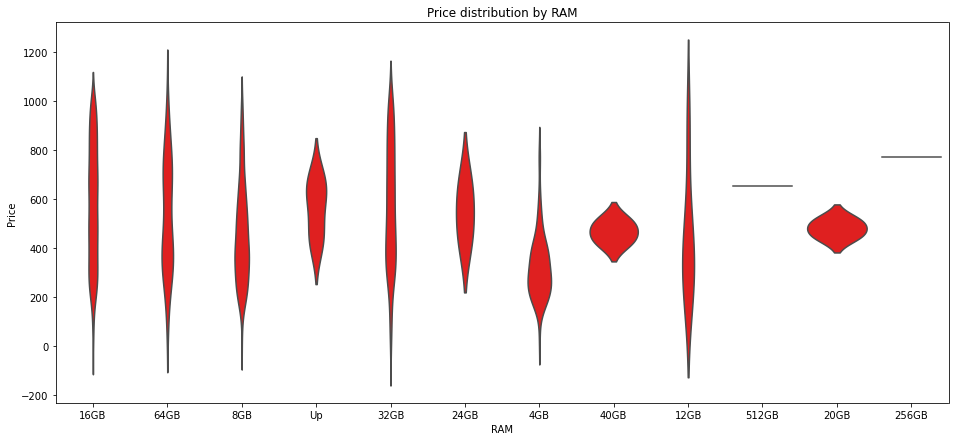

In [176]:
plt.figure(figsize=(16,7))
sns.violinplot(data = laptopy, x = "RAM", y = "Price", inner = None, color = "r")
plt.title("Price distribution by RAM")
plt.show()

Na początek uwaga - wykresy wyglądają trochę jakby istniały laptopy o ujemnej cenie. W całej ramce nie ma takich więc to pewnie "stylistyczny zabieg" seaborna.

Ogólnie rozrzut cen jest zbliżony przy większości kategorii. Odstaje 24 GB, 40 GB, 20 GB, 512 GB i 256 GB. Dwa ostatnie wyniki tłumaczy to, że takich laptopów było po jednym, pozostałe kategorie też nie są liczne. Jest jeszcze tajemnicza kategoria Up - prawdopodobnie niezaaktualizowane dane.

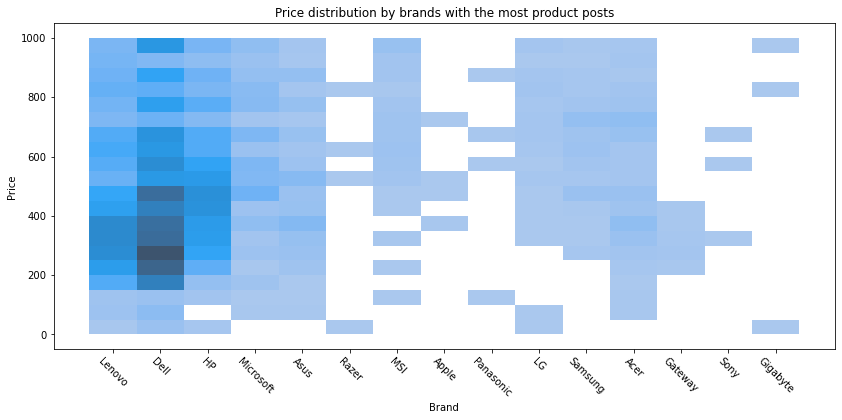

In [224]:
marki = laptopy[["Brand", "Price"]].groupby("Brand").count().sort_values("Price", ascending = False).reset_index().loc[0:14, "Brand"]
df2 = laptopy.loc[laptopy["Brand"].isin(marki), :]
plt.figure(figsize=(14, 6))
g = sns.histplot(data = df2,
            y = "Price",
            x = "Brand")
plt.title("Price distribution by brands with the most product posts")
plt.xticks(rotation = -45)
plt.show()

W powyższym zestawieniu wyróżniają się trzy firmy : Lenovo, Dell i HP. Z dostępnych danych wynika, że właśnie te trzy firmy oferowały najwięcej swoich produktów na eBayu (i dość istotnie więcej niż pozostałe). Cenowo były to raczej laptopy z dolnej połowy skali.

### Zależności

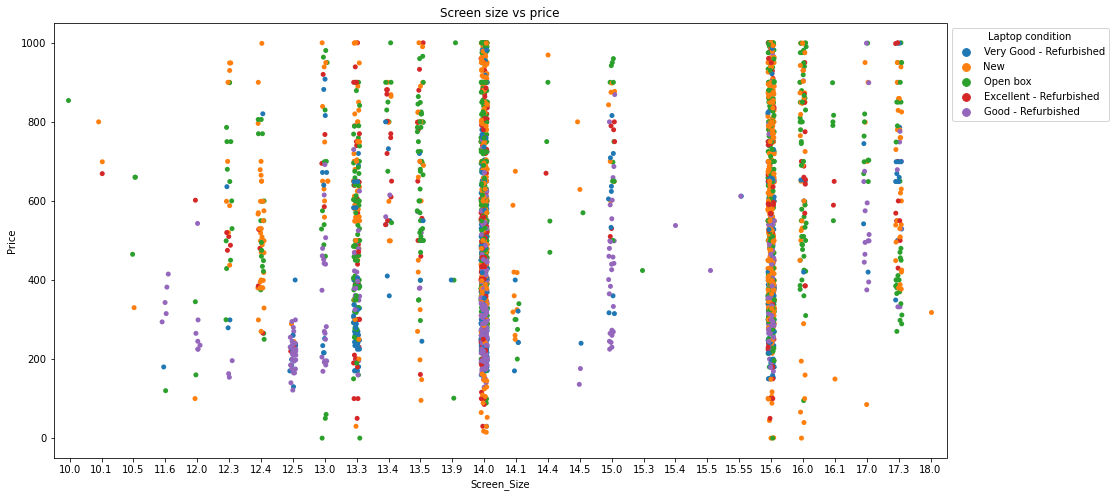

In [198]:
plt.figure(figsize = (16, 8))
sns.stripplot(data = laptopy,
               x = "Screen_Size",
               y = "Price",
               hue = "Condition")
plt.legend(bbox_to_anchor=(1, 1), title = "Laptop condition")
plt.title("Screen size vs price")
plt.show()

Wielkość ekranu nie ma istotnego wpływu na cenę laptopa - w każdej kategorii rozrzut cen jest bardzo duży. Można za to zauważyć, że laptopy używane mieszczą się zwykle w dolnym połowie skali cenowej.

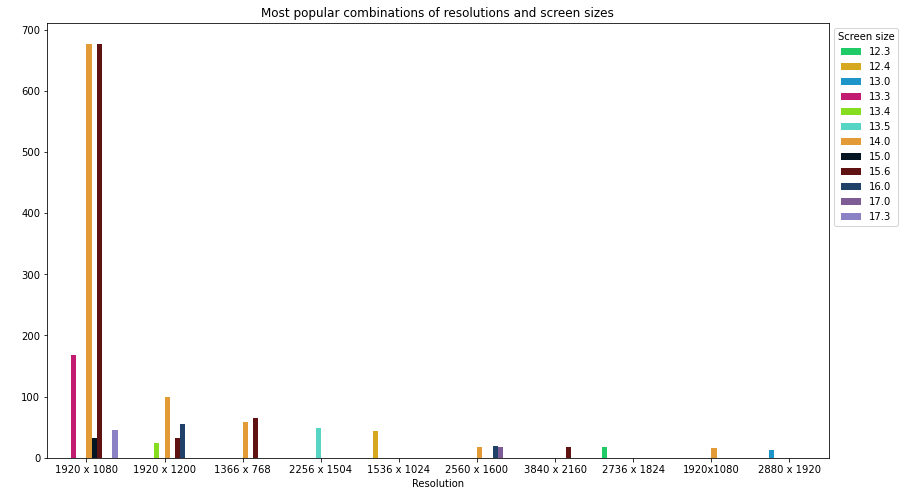

In [219]:
df3 = laptopy.groupby(["Resolution", "Screen_Size"]).count().reset_index().sort_values(by = ["Brand"], ascending = False).head(20)
plt.figure(figsize = (14, 8))

palette = ["#04E762", "#F5B700", "#00A1E4", "#DC0073", "#89FC00", "#41EAD4", "#FF9F1C", "#011627", "#6B0504", "#134074", "#7E52A0", "#8377D1"]
sns.barplot(data=df3, x = "Resolution", y = "Brand", hue = "Screen_Size", palette = palette)
plt.title("Most popular combinations of resolutions and screen sizes")
plt.ylabel(" ")
plt.legend(bbox_to_anchor=(1, 1), title = "Screen size")
plt.show()

Najbardziej popularne (znacząco) są laptopy o rozdzielczości 1920 $\times$ 1080 pikseli, a wśród nich, najczęstsze są takie o rozmiarze 14 cali i 15.6 cali. 